<a href="https://colab.research.google.com/github/SriRamK345/Retail_Sales_Forecast/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data cleaning
import pandas as pd
import numpy as np
# Visualization / EDA
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical analysis
from scipy import stats
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Model selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### Import dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/scaled_df.csv")
df.head()

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,-1.219345,-1.371894,-1.215359,-1.657605,-1.417264,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,0.747976
1,-1.219345,-1.371894,-1.215359,-1.657605,-1.384487,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.648668
2,-1.219345,-1.371894,-1.215359,-1.657605,-1.351710,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,0.202083
3,-1.219345,-1.371894,-1.215359,-1.657605,-1.318932,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.312042
4,-1.219345,-1.371894,-1.215359,-1.657605,-1.286155,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.038675


In [3]:
df.shape

(420150, 18)

In [4]:
df.isnull().sum()

,0
Day,0
Month,0
Year,0
Store,0
Dept,0
Type,0
Size,0
IsHoliday,0
Temperature,0
Fuel_Price,0


In [5]:
df.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'Size', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales'],
      dtype='object')

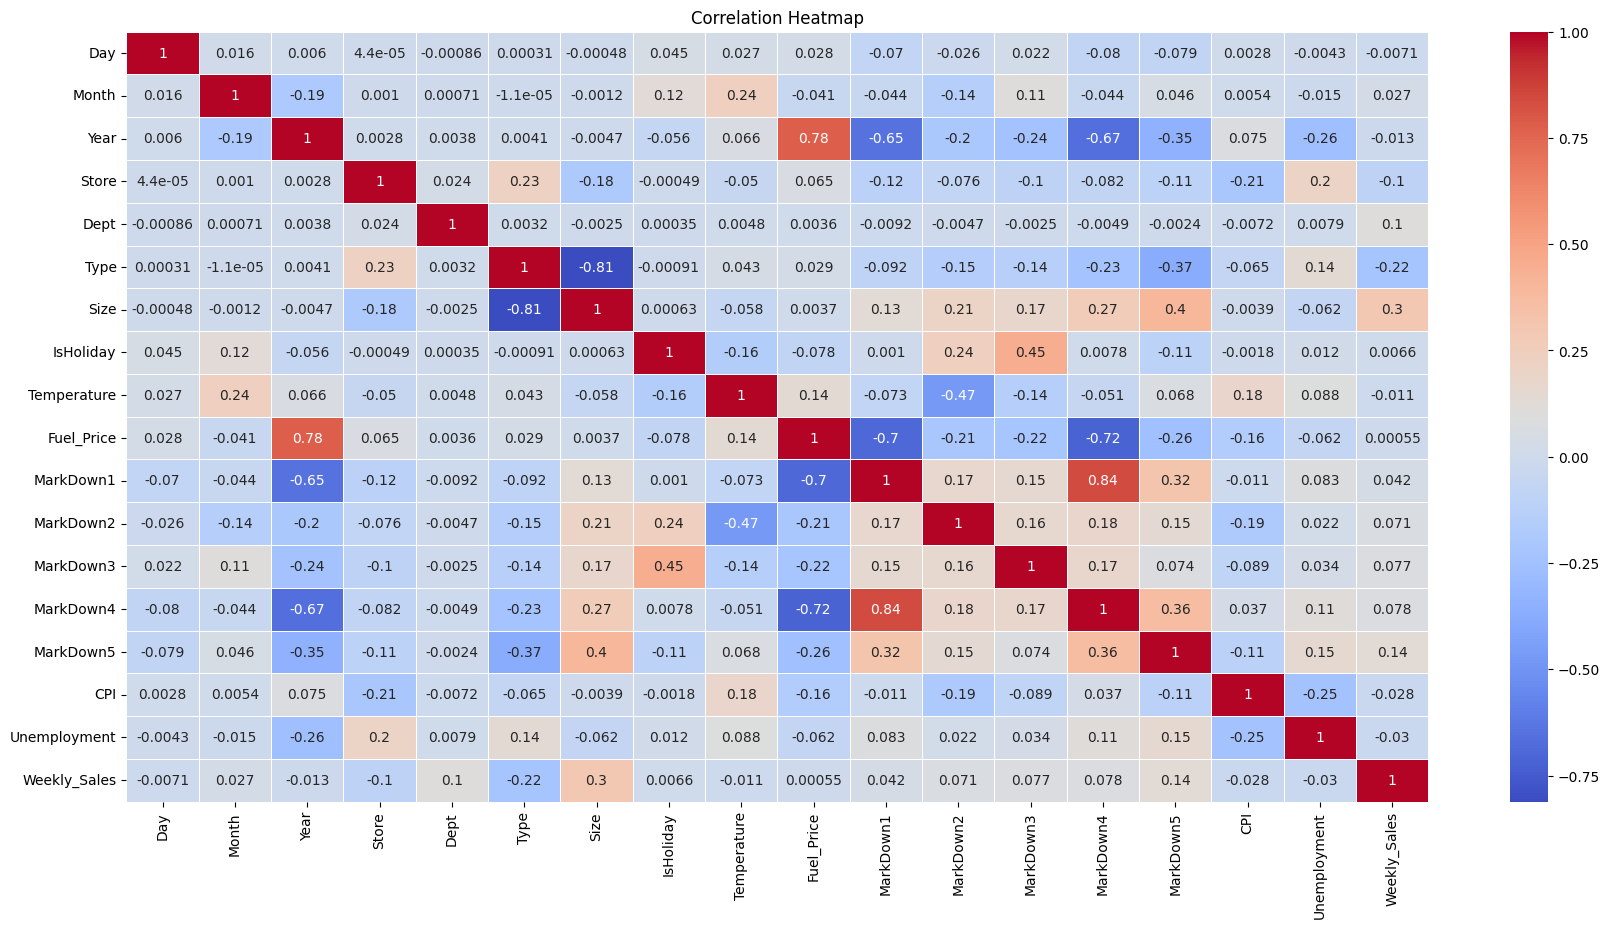

In [6]:
plt.figure(figsize=(21, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Separating Data into Test and Training Set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop("Weekly_Sales", axis =1 )
y = df["Weekly_Sales"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 315112
X_test: 105038
y_train: 315112
y_test: 105038


In [11]:
corr_matrix = df.corr()
corr_matrix

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
Day,1.000000,0.016015,0.005957,0.000044,-0.000861,0.000313,-0.000478,0.044851,0.027000,0.028148,-0.070032,-0.025848,0.021751,-0.080355,-0.079223,0.002822,-0.004308,-0.007064
Month,0.016015,1.000000,-0.194202,0.001005,0.000708,-0.000011,-0.001173,0.122693,0.236176,-0.040871,-0.043646,-0.140472,0.106867,-0.043638,0.046026,0.005446,-0.015214,0.026542
Year,0.005957,-0.194202,1.000000,0.002789,0.003756,0.004050,-0.004663,-0.056418,0.065643,0.779681,-0.650961,-0.199594,-0.241623,-0.669096,-0.350067,0.074520,-0.260444,-0.013341
Store,0.000044,0.001005,0.002789,1.000000,0.024265,0.226352,-0.182737,-0.000487,-0.050281,0.065298,-0.115660,-0.075544,-0.103322,-0.081766,-0.107293,-0.211325,0.204985,-0.102684
Dept,-0.000861,0.000708,0.003756,0.024265,1.000000,0.003181,-0.002529,0.000345,0.004775,0.003565,-0.009198,-0.004741,-0.002519,-0.004852,-0.002430,-0.007167,0.007860,0.102679
Type,0.000313,-0.000011,0.004050,0.226352,0.003181,1.000000,-0.811527,-0.000908,0.042993,0.029446,-0.091996,-0.148083,-0.136982,-0.233371,-0.374240,-0.065065,0.138268,-0.224206
Size,-0.000478,-0.001173,-0.004663,-0.182737,-0.002529,-0.811527,1.000000,0.000633,-0.058344,0.003682,0.132348,0.207283,0.174052,0.270635,0.404510,-0.003918,-0.061661,0.297248
IsHoliday,0.044851,0.122693,-0.056418,-0.000487,0.000345,-0.000908,0.000633,1.000000,-0.155673,-0.078120,0.001049,0.235909,0.452030,0.007771,-0.110033,-0.001831,0.011713,0.006620
Temperature,0.027000,0.236176,0.065643,-0.050281,0.004775,0.042993,-0.058344,-0.155673,1.000000,0.143674,-0.072945,-0.473407,-0.142861,-0.051196,0.068059,0.182197,0.087591,-0.010828
Fuel_Price,0.028148,-0.040871,0.779681,0.065298,0.003565,0.029446,0.003682,-0.078120,0.143674,1.000000,-0.695284,-0.213887,-0.220602,-0.717232,-0.257877,-0.164212,-0.062269,0.000548


### Modelling and Evaluation matrix

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [13]:
def evaluation_matrix(actual, pred):
  MAE = mean_absolute_error(actual, pred)
  MSE = mean_squared_error(actual, pred)
  RMSE = np.sqrt(mean_squared_error(actual, pred))
  SCORE = r2_score(actual, pred)
  return print("\n","r2_score:",SCORE , "\n","MAE:", MAE, "\n","MSE",MSE, "\n","RMSE", RMSE)

In [14]:
def evaluate_model_cv(model, X, y, cv=10):
    cv_scores = cross_val_score(estimator=model, X=X, y=y, cv=cv)    # Perform cross-validation and calculate the mean score
    mean_cv_score = cv_scores.mean()
    return mean_cv_score

In [15]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

In [16]:
evaluation_matrix(y_test, y_pred)


 r2_score: 0.9840381740245767 
 MAE: 0.0749152452258826 
 MSE 0.016005138477786608 
 RMSE 0.12651141639309318


In [17]:
evaluate_model_cv(RF_model, X_train, y_train, cv=5)

0.982354582591789

In [18]:
my_dist = {"Actual" : y_test , "Predict" : y_pred}
compare = pd.DataFrame(my_dist)

In [19]:
compare.sample(10)

,Actual,Predict
320949,0.435501,0.419597
70675,-0.751808,-0.808784
185637,-1.339235,-1.287371
288875,1.923345,2.000732
7361,-0.389467,-0.309664
293044,-0.169514,-0.208207
124039,-0.284415,-0.159103
401483,-1.082348,-1.073841
73655,1.202971,0.868272
177610,3.228508,3.194302


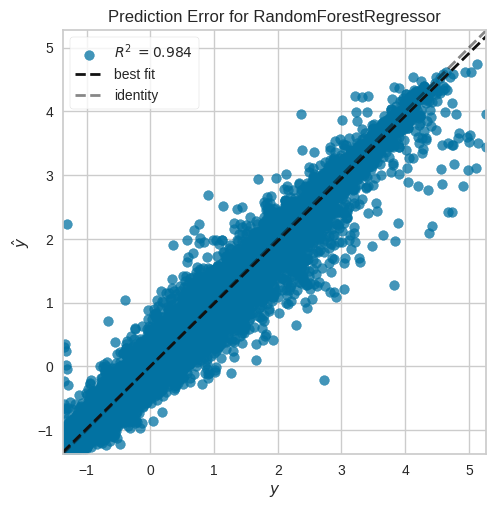

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [22]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(RF_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

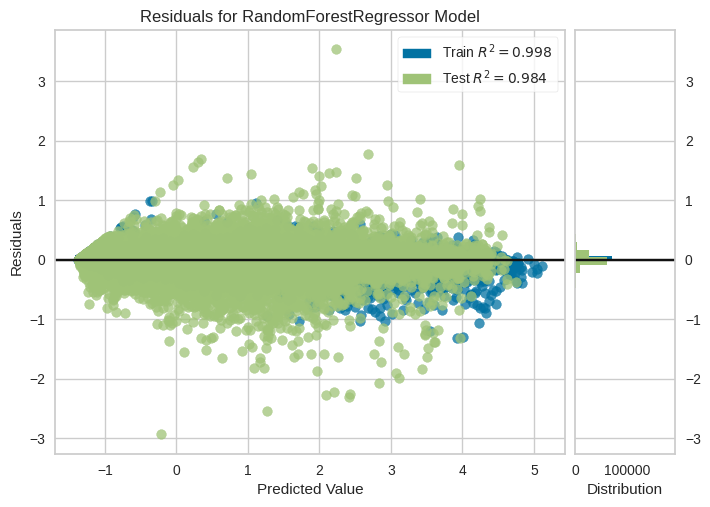

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(RF_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

In [24]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.10510272213139404 
 MAE: 0.7524471831688856 
 MSE 0.8973255865422043 
 RMSE 0.947272709699907


In [27]:
evaluate_model_cv(LR_model, X_train, y_train, cv=10)

0.10592221090653649

In [28]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=5) # Example with max_depth=5
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.5138163089165327 
 MAE: 0.5262280865000515 
 MSE 0.4875029531968038 
 RMSE 0.6982141170134014


In [29]:
my_dist = {"Actual" : y_test , "Predict" : y_pred}
compare = pd.DataFrame(my_dist)
compare.sample(10)

,Actual,Predict
13129,-0.426289,0.090423
349010,-0.769433,-1.018851
270587,-0.153912,-0.152945
419445,0.179060,-0.152945
81536,0.124482,0.090423
155678,-1.325749,-0.485150
174209,-0.641287,-0.152945
335196,-0.621427,0.367479
162185,-0.752948,-0.152945
312789,2.323719,-0.152945


In [30]:
evaluate_model_cv(DT_model, X_train, y_train, cv=10)

0.5170258395916401

In [31]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.9194380265697197 
 MAE: 0.20027194596549688 
 MSE 0.08078057878720894 
 RMSE 0.2842192442239071


In [32]:
evaluate_model_cv(XGB_model, X_train, y_train, cv=10)

0.91863362329255

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model=ExtraTreesRegressor()
ET_model.fit(X_train,y_train)
y_pred = ET_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.985724132163617 
 MAE: 0.0720350120485501 
 MSE 0.014314605482085505 
 RMSE 0.11964366043416386


In [34]:
evaluate_model_cv(ET_model, X_train, y_train, cv=5)

0.9839323177189309

In [35]:
import pickle

# Save the model to a file
#with open('RF_model.pkl', 'wb') as file:
#    pickle.dump(RF_model, file)

# Load the model from the file
# with open('RF_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# Use the loaded model to make predictions
#predictions = loaded_model.predict(X_test)